# 5. Iterative Computation

Many algorithm involve iterative computation until a solution is found with a desired accuracy.

Also many mathematical models are formulated as a mapping from the current state to the next state, which gives discrete-time dynamics.

References:
* Python Tutorial chapter 4: Control Flow Tools
* Wikipedia: Newton's method, Logistic map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's method
For a linear equation $A x = b$, or $A x - b = 0$, the solution is given using the inverse matrix as 
$$x = A^{-1} b. $$  

For a general nonlinear equation $f(x) = 0$, the solution may require iterative approximation.
A typical way is by the Newton's method:  
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$
starting from an initial guess $x_0$.

### Example
Let us define a plynomial function and its derivative.

In [2]:
def poly(x, a, deriv=True):
    """Polynomial a[0] + a[1]*x + ... + a[n]*x**n
        and its derivative a[1] + 2*a[2]*x + ... + n*a[n]*x**(n-1)"""
    n = len(a)  # order+1
    xp = np.array([x**i for i in range(n)])  # 1, x,.. x**(n-1)
    y = np.dot(a, xp)
    if deriv==False:
        return y
    xq = np.array([i*x**(i-1) for i in range(1,n)])  # 1, 2*x,.. n*x**(n-1))
    dy = np.dot(a[1:], xq)
    return y, dy

In [3]:
poly(1, [3, 2, 1])

(6, 4)

In [4]:
poly(1, [3, 2, 1], deriv=False)

6

Here is an example polynomial with three zero-crossing points.

[ 6 -5 -2  1]


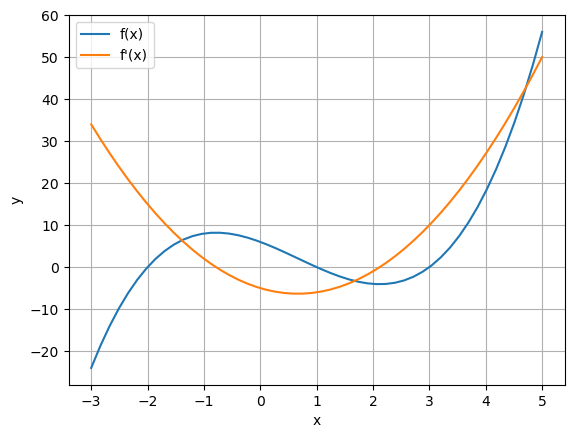

In [5]:
# f(x) = (x-3)(x-1)(x+2) = 6 - 5x -2x^2 + x^3 
a = np.array([6, -5, -2, 1])
#a = np.random.randn(4) # random coefficients
print(a)
x = np.linspace(-3, 5, 50)
y, dy = poly(x, a)
plt.plot(x, y, x, dy)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');
plt.legend(('f(x)','f\'(x)'));

Here's a simple implementation of Newton's method with visualization.

In [6]:
def newton(f, x0, a, target=1e-6, maxstep=20):
    """Newton's method. 
        f: return f and df/dx
        x: initial guess
        a: parameter for f(x,a)
        target: accuracy target"""
    x = np.zeros(maxstep+1)
    y = np.zeros(maxstep)
    x[0] = x0
    for i in range(maxstep):
        y[i], dy = f(x[i], a)
        if abs(y[i]) < target:
            break  # converged!
        x[i+1] = x[i] - y[i]/dy    # new x
    else:
        print('did not coverge in', maxstep, 'steps.')
    return x[:i+1], y[:i+1]

Let us see how it works.

In [7]:
newton(poly, 5, a)

(array([5.        , 3.88      , 3.27527854, 3.04063338, 3.00110572,
        3.00000085, 3.        ]),
 array([5.60000000e+01, 1.49022720e+01, 3.30409339e+00, 4.17958407e-01,
        1.10657543e-02, 8.54778237e-06, 5.11590770e-12]))

In [8]:
newton(poly, 0, a)

(array([0.        , 1.2       , 0.98978102, 0.99998301, 1.        ]),
 array([ 6.00000000e+00, -1.15200000e+00,  6.14172290e-02,  1.01951561e-04,
         2.88712498e-10]))

Here is a graphical representation.

In [9]:
def zigsawplot(x, y):
    """zigsaw lines of updates
    (x0,0),(x0,y0),(x1,0), (x1,y1),...(xn,0),(xn,yn)"""
    x = np.repeat(x, 2)  # duplicate items
    y = np.c_[np.zeros_like(y),y].ravel()  # insert zeros
    plt.plot(x, y)

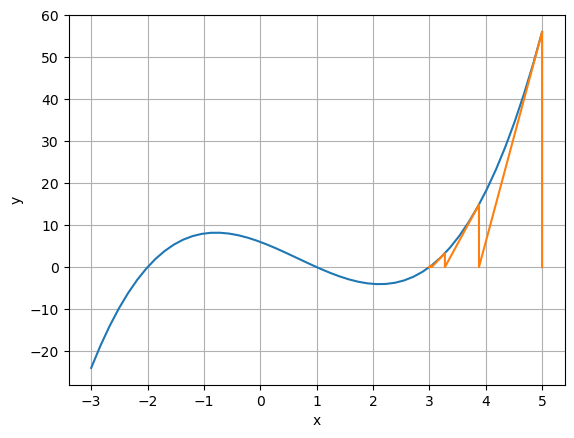

In [10]:
plt.plot(x, y)
xt, yt = newton(poly, 5, a)
zigsawplot(xt, yt)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');

Try starting from other initial guesses

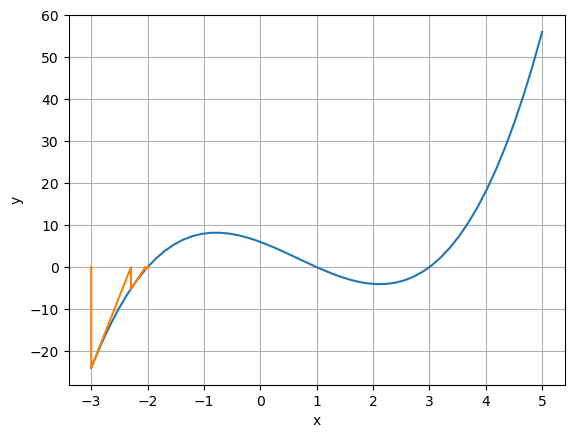

In [11]:
plt.plot(x, y)
xt, yt = newton(poly, -3, a)
zigsawplot(xt, yt)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');

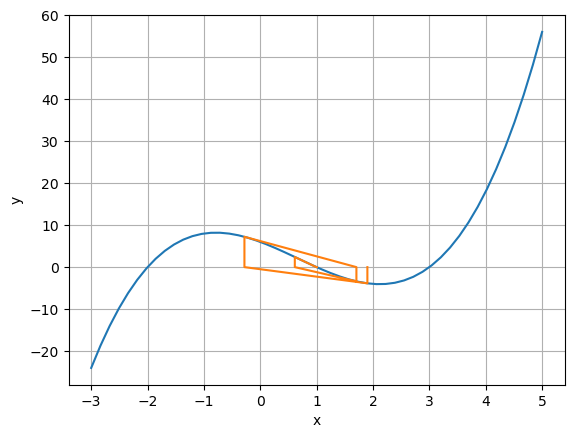

In [12]:
plt.plot(x, y)
xt, yt = newton(poly, 1.9, a)
zigsawplot(xt, yt)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');

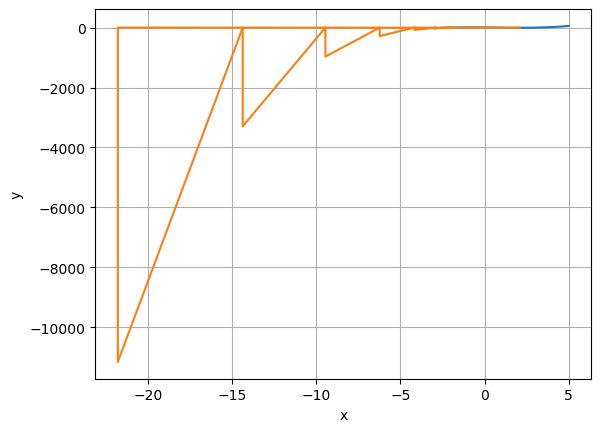

In [13]:
plt.plot(x, y)
xt, yt = newton(poly, 2.1, a)
zigsawplot(xt, yt)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');

## Quasi-Newton Method
The derivative $f'(x)$ may not be available or hard to compute.
In that case, we can use the slope between two points to approximate the derivative.
$$f'(x) \simeq \frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}} $$

Quasi-Neuton method uses pairs of points to find the solution:
$$x_{k+1} = x_k - f(x_k)\frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})} $$
starting from an initial guess $x_0$.

In [14]:
def qnewton(f, x0, x1, *args, target=1e-6, maxstep=20):
    """Quasi-Newton's method. 
        f: return f
        x: initial guess
        x0, x1: initial guess at two points
        *args: parameter for f(x,*args)
        target: accuracy target"""
    x = np.zeros(maxstep+2)
    y = np.zeros(maxstep+1)
    x[0], x[1] = x0, x1
    y[0] = f(x[0], *args)
    for i in range(1, maxstep+1):
        y[i] = f(x[i], *args)
        dy = (y[i] - y[i-1])/(x[i] - x[i-1])  # approximate derivative
        if abs(y[i]) < target:
            break  # converged!
        x[i+1] = x[i] - y[i]/dy    # new x
    else:
        print('did not coverge in', maxstep, 'steps.')
    return x[:i+1], y[:i+1]

In [15]:
qnewton(poly, 5, 4, a, False)

(array([5.        , 4.        , 3.52631579, 3.19955654, 3.05234137,
        3.00641035, 3.00022742, 3.00000102, 3.        ]),
 array([5.60000000e+01, 1.80000000e+01, 7.34800991e+00, 2.28227200e+00,
        5.42734403e-01, 6.43913708e-02, 2.27452245e-03, 1.01671083e-05,
        1.61831082e-09]))

In [16]:
def qnplot(x, y):
    """lines for quasi-Newton updates
    (x0,0),(x0,y0),(x2,0), (x1,0),(x1,y1),(x3,0),...(xn,0),(xn,yn)"""
    for i in range(len(x)-2):
        plt.plot([x[i],x[i],x[i+2]], [0,y[i],0])

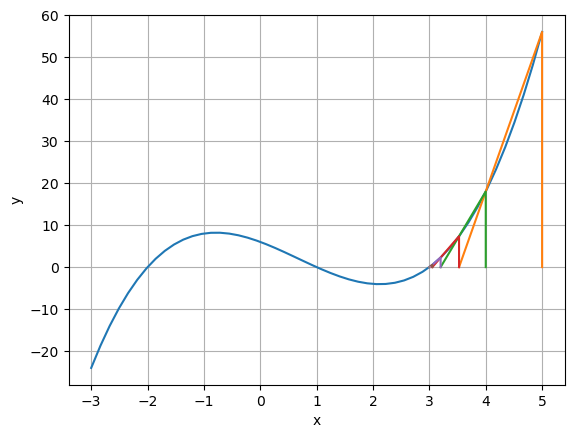

In [17]:
plt.plot(x, y)
xt, yt = qnewton(poly, 5, 4, a, False)
qnplot(xt, yt)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');

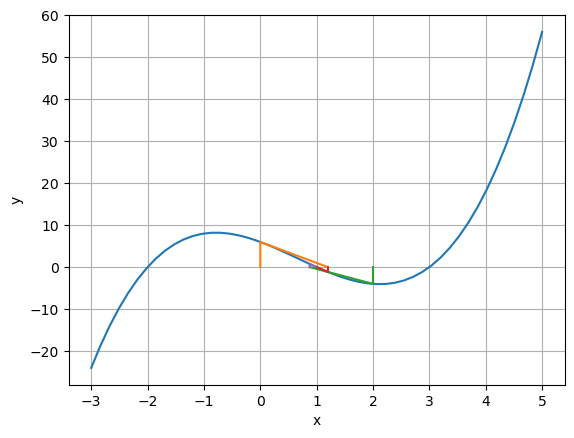

In [18]:
plt.plot(x, y)
xt, yt = qnewton(poly, 0, 2, a, False)
qnplot(xt, yt)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');

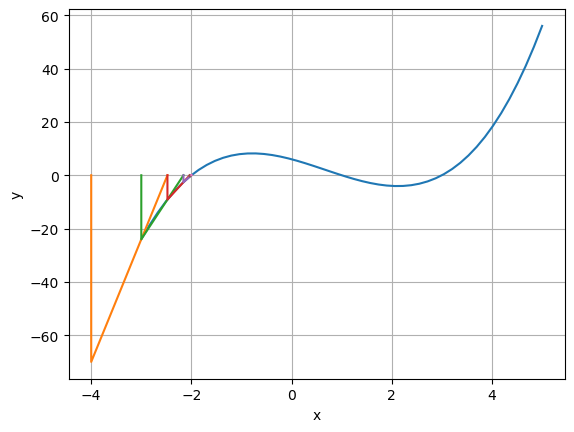

In [19]:
plt.plot(x, y)
xt, yt = qnewton(poly, -4, -3, a, False)
qnplot(xt, yt)
plt.grid('on'); plt.xlabel('x'); plt.ylabel('y');

Define your own function and see how Newton's or Quasi-Newton method works.

## Discrete-time Dynamics
We have already seen the iterative dynamics by multiplication of a matrix, which can cause expansion, shrinkage, and rotation.  
With nonlinear mapping, more varieties of behaviors including chaos can be observed.

### 1D Dynamics
The simplest case is the logistic map.
$$ x_{k+1} = a x_k(1 - x_k) $$

In [20]:
def logistic(x, a):
    """logistic map: f(x) = a*x*(1-x)"""
    return a*x*(1 - x)

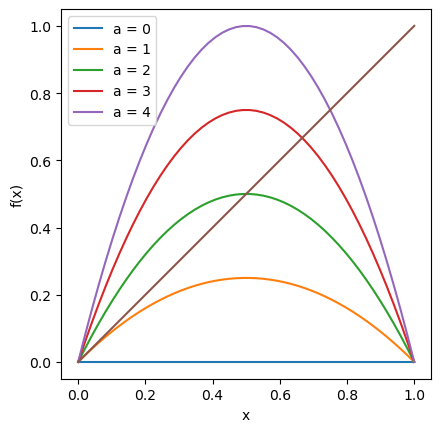

In [21]:
x = np.linspace(0, 1, 50)
# plot with different levels of a
A = np.arange(5)
leg = []
for a in A:
    y = logistic(x, a)
    plt.plot(x, y)
    leg.append('a = {}'.format(a))
plt.legend(leg)
plt.plot([0,1], [0,1])  # x=f(x) line
plt.xlabel('x'); plt.ylabel('f(x)')
plt.axis('square');

In [22]:
def iterate(f, x0, a, steps=100):
    """x0: initial value
        a: parameter to f(x,a)"""
    x = np.zeros(steps+1)
    x[0] = x0
    for k in range(steps):
        x[k+1] = f(x[k], a)
    return x

Try iteration with different parameter $a$.

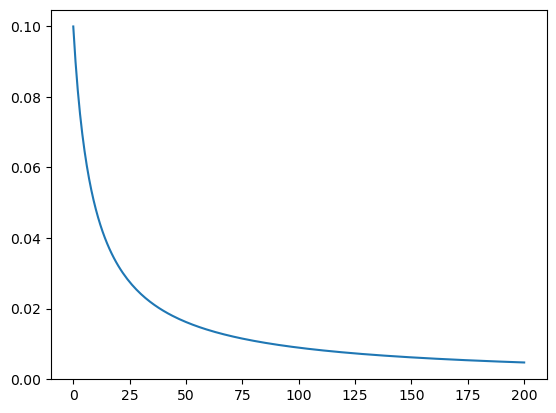

In [23]:
a = 1
xt = iterate(logistic, 0.1, a, 200)
plt.plot(xt);

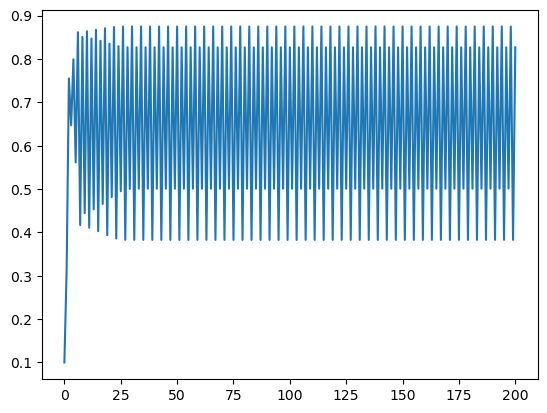

In [24]:
a = 3.5
xt = iterate(logistic, 0.1, a, 200)
plt.plot(xt);

Trajectory in $x_k$-$x_{k+1}$ plane, called "cobsplot".

In [25]:
def cobsplot(x):
    """cobsplot of trajectory x"""
    plt.plot([0,1], [0,1])  # x=f(x) line
    x2 = np.repeat(x, 2)  # duplicate items
    plt.plot(x2[:-1], x2[1:], lw=0.5) # (x0,x1), (x1,x1), (x1,x2),...
    plt.xlabel('$x_k$'); plt.ylabel('$x_{k+1}$');
    plt.axis('square');

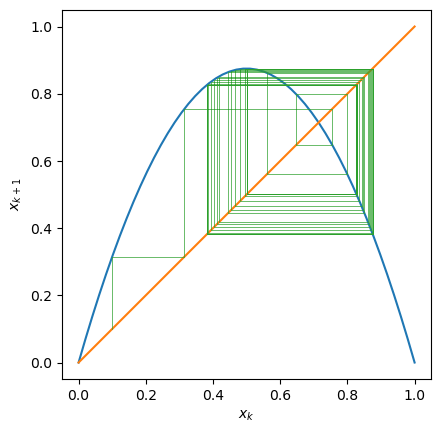

In [26]:
y = logistic(x, a)
plt.plot(x, y)  # plot the map
cobsplot(xt)  # plot the trajectory

It is known that $3.57<a<4$ can cause chaotic oscillation.

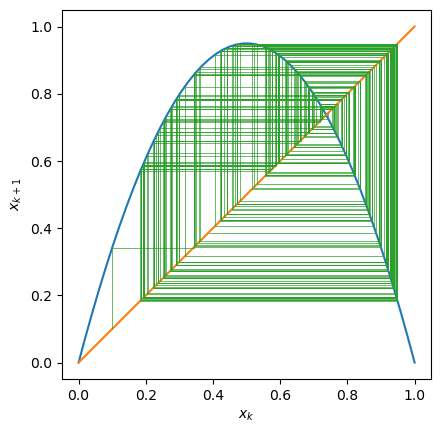

In [27]:
a = 3.8
y = logistic(x, a)
plt.plot(x, y)  # plot the map
xt = iterate(logistic, 0.1, a, 200)
cobsplot(xt)  # plot the trajectory

### 2D Dynamics
Let us see an example of the Hénon map:
$$        x_{k+1} = 1 - a x_k^2 + y_k $$
$$ y_{k+1} = b x_k $$

In [28]:
def henon(xy, ab=[1.4, 0.3]):
    """Henon map: stretch in y and fold to x
        x_{k+1} = 1 - a*x_k**2 + y_k
        y_{k+1} = b*x_k
        xy: state [x, y]
        ab: parameters [a, b]
    """
    x = 1 - ab[0]*xy[0]**2 + xy[1]
    y = ab[1]*xy[0]
    return np.array([x, y])

In [29]:
henon([1,1])

array([0.6, 0.3])

In [30]:
def iterate_vec(f, x0, *args, steps=100):
    """f: n-dimensional map
        x0: initial vector
        *args: optional parameter to f(x,*args) """
    n = len(x0)  # state dimension
    x = np.zeros((steps+1, n))
    x[0] = x0
    for k in range(steps):
        x[k+1] = f(x[k], *args) 
    return x

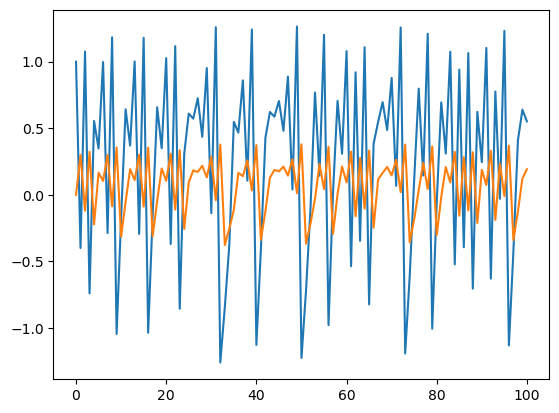

In [31]:
x = iterate_vec(henon, [1, 0])
plt.plot(x);

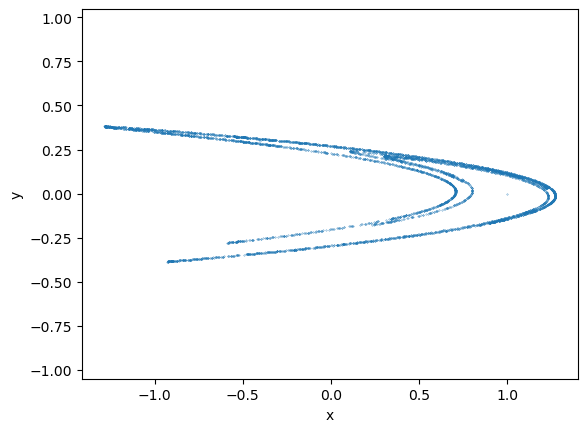

In [32]:
x = iterate_vec(henon, [1, 0], [1.4, 0.3], steps=5000)
plt.plot(x[:,0], x[:,1], '.', markersize=0.5)
plt.xlabel('x'); plt.ylabel('y'); plt.axis('equal');

In [33]:
x

array([[ 1.        ,  0.        ],
       [-0.4       ,  0.3       ],
       [ 1.076     , -0.12      ],
       ...,
       [ 1.18897557,  0.04904292],
       [-0.93008516,  0.35669267],
       [ 0.14561091, -0.27902555]])

Here's another example:  Gumowski-Mira map, which originates from a model of accelerator beams:
$$ x_{n+1} = y_n + \alpha y_n (1-\sigma y_n^2) + g(x_n) $$
$$ y_{n+1} = -x_n + g(x_{n+1}) $$
$$ g(x) = \mu x + \frac{2(1-\mu)x^2}{1+x^2} $$

In [34]:
def gumowski_mira(xy, asm=[0.009, 0.05, -0.801]):
    """Gumowski-Mira map:
        x_{k+1} = y_n + \alpha y_n (1-\sigma y_n^2) + g(x_n
        y_{k+1} = -x_n + g(x_{n+1})
        g(x) = \mu x + \frac{2(1-\mu)x^2}{1+x^2}
        xy: state [x, y]
        asm: parameters [a, sigma, mu]
    """
    x, y = np.array(xy, dtype=float)  # unpack array
    alpha, sigma, mu = np.array(asm, dtype=float)
    # local function
    def g(x):
        return mu*x + 2*(1-mu)*x**2/(1+x**2)

    x1 = y + alpha*y*(1 - sigma*y**2) + g(x)
    y1 = -x + g(x1) 
    return np.array([x1, y1])

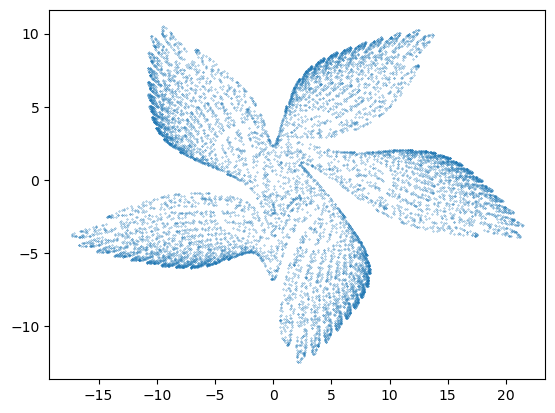

In [35]:
x = iterate_vec(gumowski_mira, [1, 1], steps=10000)
plt.plot(x[:,0], x[:,1], '.', markersize=0.5);

## Recursive call
In Python and other modern languages, a function and call itself from inside. This can allow compact coding for complex functions.

In [36]:
def factorial(n):
    """factorial by recursice call"""
    if n == 0:
        return 1
    else:
        return factorial(n-1)*n

In [37]:
factorial(4)

24

### Drawing fractals
Recursive calls can be used for drawing *fractal* figures that have multi-scale self-similar structures.

One example is the *Cantor set*, which is made by iteratively removing the middle part of a segment.

In [38]:
def cantorplot(x0=0, x1=1, a=1/3, e=1e-4):
    """draw a Cantor set
    x0, x1: end points
    a: fraction to fill
    e: minimal resolution"""
    u = x1 - x0  # length
    if abs(u) < e:  # for a very short segment
        plt.plot([x0, x1], [0, 0])  # straight line
    else:
        cantorplot(x0, x0+a*u, a, e)  # left 1/3
        cantorplot(x1-a*u, x1, a, e)  # right 1/3

In [39]:
# Interactive mode to allow zooming up
%matplotlib notebook

In [40]:
plt.figure(figsize=(10,2))
cantorplot(a=0.4)

<IPython.core.display.Javascript object>

Here is an example of drawing complex lines like a coastline or a clowd by replacing a segment with zig-zag segments.

In [41]:
def fractaline(x0=[0,0], x1=[1,0], a=[0.1, -0.1], e=1e-2):
    """draw a fractal line
    x0, x1: start, end points
    a: shifts of via points
    e: minimal resolution"""
    n = np.size(a)   # number of via points
    x = np.zeros((n+2,2))
    x[0], x[-1] = x0, x1
    u = x[-1] - x[0]   # connecting vector
    v = np.array([-u[1],u[0]])  # orthogonal vector
    for i, ai in enumerate(a):
        x[i+1] = x0 + u*(i+1)/(n+1) + ai*v  # shift of via points
    #print(x)
    if sum((u**2)) < e**2: # if the segment is very short
        plt.plot(x[:,0],x[:,1])  # draw a straight line
    else:
        for i in range(n+1):  # n segments
            fractaline(x[i], x[i+1], a, e)
    plt.axis('equal');

In [42]:
plt.figure(figsize=(10,4))
fractaline()

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(10,5))
fractaline(a=[0.2])

<IPython.core.display.Javascript object>